# Testing Both Models

In [1]:
# import all libraries
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image

## Time taken to train models


In [2]:
# read log json files
f = open('log_gpu.json',)
log_gpu = json.load(f)
f.close()

f = open('log_cpu.json',)
log_cpu = json.load(f)
f.close()

print(log_gpu.keys())
print(log_cpu.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'time_to_train_gpu'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'time_to_train_gpu'])


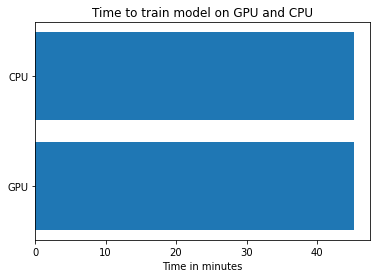

In [3]:
# Plot
gpu_training_time = log_gpu['time_to_train_gpu']
cpu_training_time = log_cpu['time_to_train_cpu']


# convert to minutes
gpu_training_time = gpu_training_time/60
cpu_training_time = cpu_training_time/60

x = ['GPU', 'CPU']
y = [gpu_training_time, cpu_training_time]

plt.barh(x, y)
plt.xlabel("Time in minutes")
plt.title("Time to train model on GPU and CPU")

plt.savefig('time_to_train.png', dpi=300, bbox_inches='tight')
plt.show()

## Testing Both Models Against Testing Set
There are 1000 test images for both cat and dog class. The label for cat is 0 and dog is 1. If a model predicts 1000 cat images as 0 then the accuracy is 100% and the same for dog.

### GPU Model

In [4]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for cat images
total_images = 0
images_correctly_labelled = 0
true_label = 0

# load the model
model = keras.models.load_model('models/trained_model_gpu.h5')

cats_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/cat'
for filename in os.listdir(cats_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = cats_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class CAT--> {images_correctly_labelled/total_images*100}%')

2021-10-12 23:43:30.449669: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-12 23:43:30.615130: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Total images --> 1000
Images correctly labelled --> 711

Accuracy for class CAT--> 71.1%


In [5]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for dog images
total_images = 0
images_correctly_labelled = 0
true_label = 1

# load the model
model = keras.models.load_model('models/trained_model_gpu.h5')

dogs_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/dog'
for filename in os.listdir(dogs_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = dogs_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class DOG--> {images_correctly_labelled/total_images*100}%')

Total images --> 1000
Images correctly labelled --> 875

Accuracy for class DOG--> 87.5%


### CPU Model

In [ ]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for cat images
total_images = 0
images_correctly_labelled = 0
true_label = 0

# load the model
model = keras.models.load_model('models/trained_model_cpu.h5')

cats_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/cat'
for filename in os.listdir(cats_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = cats_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class CAT--> {images_correctly_labelled/total_images*100}%')

In [ ]:
# Accuracy will be total images flagged as the correct folder type / total images in the folder

# Testing accuracy for dog images
total_images = 0
images_correctly_labelled = 0
true_label = 1

# load the model
model = keras.models.load_model('models/trained_model_cpu.h5')

dogs_test_dir = '/Users/veersingh/Desktop/cats_dogs/test/dog'
for filename in os.listdir(dogs_test_dir):
    total_images = total_images + 1
    
    current_image_file_path = dogs_test_dir + '/' + filename
    
    current_image = image.load_img(current_image_file_path,
                                   target_size=(100, 100),
                                   color_mode='rgb')

    Y = image.img_to_array(current_image)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    
    if val == true_label:
        images_correctly_labelled = images_correctly_labelled + 1

print(f'Total images --> {total_images}')
print(f'Images correctly labelled --> {images_correctly_labelled}')

print(f'\nAccuracy for class DOG--> {images_correctly_labelled/total_images*100}%')

## Conclusion

As we can see both GPU and CPU models perform the same, the only difference was the training time. GPU doesnt help in increasing performance, but simply makes the process faster.